# UPPER CONFiDENCE BOUNd (UCB)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [7]:
dts = pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing UCB

In [16]:
N = len(dts)                        # number of users
d = len(dts.columns)                # no of ads
ads_selected = []
numbers_of_selections = [0] *d
sum_of_rewards = [0] *d
total_reward = 0

for n in range(N):
    ad = 0
    max_ucb = 0
    for i in range(d):
        if (numbers_of_selections[i] != 0) :
            average_reward = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 *math.log(n + 1) / numbers_of_selections[i])
            ucb = average_reward + delta_i
        else:
            ucb = 1e400
        if (ucb > max_ucb):
            max_ucb = ucb
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1 
    reward = dts.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward


In [17]:
print(numbers_of_selections)
print(sum_of_rewards)
print(total_reward)

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]
[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
2178


## Visualising Results

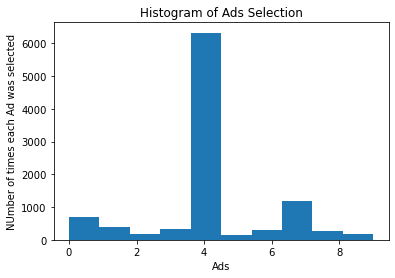

In [18]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selection")
plt.xlabel('Ads')
plt.ylabel('NUmber of times each Ad was selected')
plt.show()